# Setup

Imports, helper functions and globals.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.interpolate import interp1d

In [12]:
# Globals.
SAMPLE_RATE = 50
DATA_PATH = "../data"

# Helpers.
def clean_data(df):
    # Extract participant ID no.
    pid = df['PID'][0]
    
    # Remove extrananeous rows/columns.
    df = df.drop([0])
    df = df.drop(columns=['tags', 'PID'])
    return df, pid

def resample_cursor_data(time_series, sample_rate=SAMPLE_RATE):
    time_ms = [event['timeMs'] for event in time_series]
    valence = [event['valence'] for event in time_series]
    arousal = [event['arousal'] for event in time_series]
    
    time_ms.insert(0, 0.0)
    valence.insert(0, 0.0)
    arousal.insert(0, 0.0)
    
    valence_func = interp1d(time_ms, valence)
    arousal_func = interp1d(time_ms, arousal)
    
    period = 1/SAMPLE_RATE
    resample_time = np.arange(0, time_ms[-1], period)
    
    valence = valence_func(resample_time)
    arousal = arousal_func(resample_time)
    
    time_s = resample_time / 1000
    
    return time_s, valence, arousal

def my_plot(time, valence, arousal, title="", show=True):
    plt.plot(time, valence)
    plt.plot(time, arousal)
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized value')
    plt.legend({'Valence', 'Arousal'})
    plt.title(title)
    if show:
        plt.show()

# Analysis

Sample analysis below. Specify filename and trial number to visualize valence and arousal values over time.

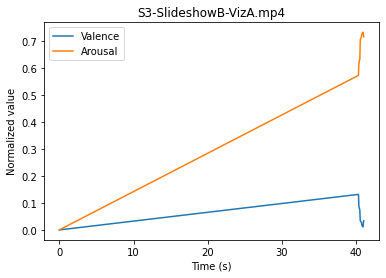

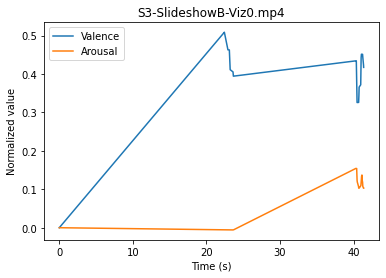

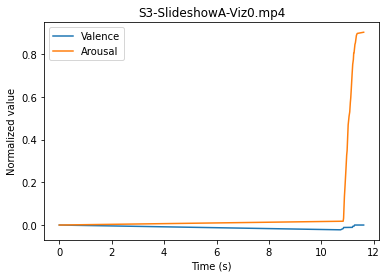

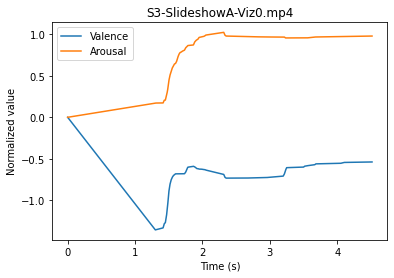

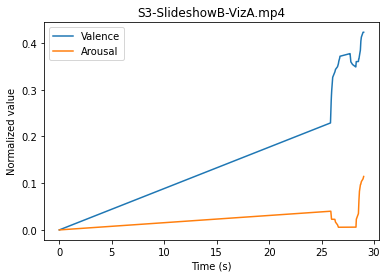

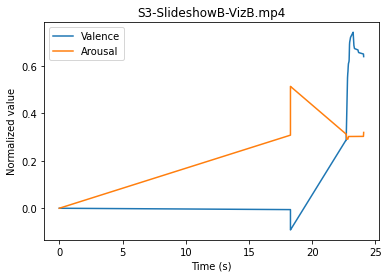

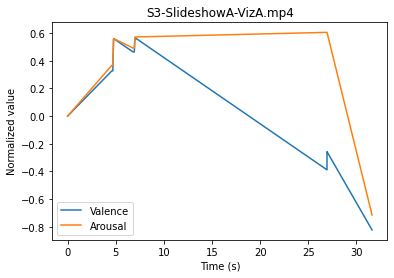

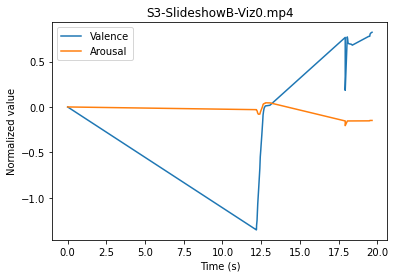

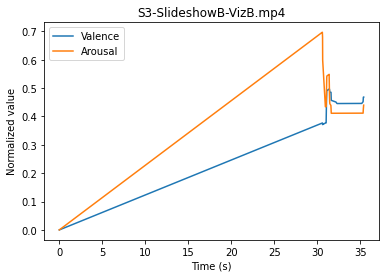

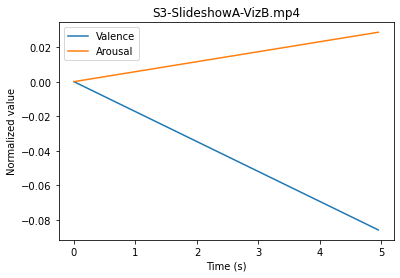

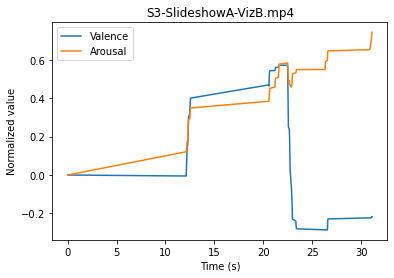

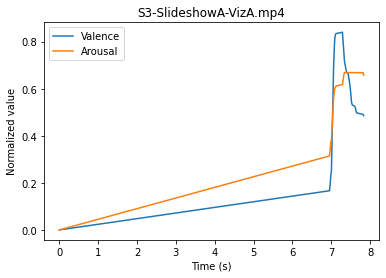

In [13]:
# Read test data.
filename = "PID_17__2021-9-7_0h37-57.json"

# Get filepath.
filepath = os.path.join(DATA_PATH, filename)

# Load and clean data.
df = pd.read_json(filepath)
df, pid = clean_data(df)

# Extract trial and resample cursor data.
for trial_no in range(12):
    
    stimulus_file = df.iloc[trial_no]["condition"].split('/')[-1]
    
    tmp = df.iloc[trial_no]['time_series']
    time, valence, arousal = resample_cursor_data(tmp)
    my_plot(time, valence, arousal, stimulus_file)